In [1]:
# Edit this cell to print out your name.
print "My name is %s" % ("Chas Premo")

My name is Chas Premo


# Predicting the weather

***For all of the questions in this project, assume that 1 month = 30 days.***

## Problem 1 (20 pts)

Suppose there is a 20% chance it will rain on any given day in a month. What are the odds that that rains on one and only one day in a month. 

Work this problem out *analytically* (with pen and paper, using a formula) and write it up in your final document.

Here you should solve the same problem *numerically* using a Monte Carlo approach, similar to how we approached the birthday problem in class. 

Make sure that both approaches give you a similar result. 

In [2]:
# Use INCLASS_numpy
##############################
import numpy as np
from numpy import random
import matplotlib.pylab as plt

%matplotlib notebook
##############################

# Probability it will rain = 0.20         
# Probability it won't rain = 0.80
# Probability from code should be around .00928 + or -
def rain():
    
    rnd_num = random.random()
    
    rain_day = False
    if rnd_num > 0 and rnd_num < 1./5.:
        rain_day = True
        
    else:
        rain_day = False
        
    return rain_day

def month():
    count = 0
    for i in range(1,31):
        if rain()==True:
            count += 1
    return count
#print month()
nmonths = 100000

count = 0
for i in range(0,nmonths):
    if month() == 1:
        count += 1 
print "The percent of months that have one rainy day is %.3f" % (100*(count/float(nmonths)))

The percent of months that have one rainy day is 0.911


## Problem 2 (20 pts)

Suppose there is a 10% chance that it will rain on any given day in a month. What are the odds that it rains at least 8 days (in any order) that month?

Work this problem out *numerically* using a Monte Carlo approach. 

In [3]:
# Your code here
def rain():
    
    rnd_num = random.random()
    if rnd_num > 0 and rnd_num < 1./10.:
        rain_day = True
        
    else: 
        rain_day = False
        
    return rain_day

def month():
    count = 0
    for i in range(1,31):
        if rain()==True:
            count += 1
    return count

nmonths = 10000

count = 0
for i in range(0,nmonths):
    if month() >= 8:
        count += 1
print "Percent of months that rain at least 8 days is %.3f" % (100*(count/float(nmonths)))


Percent of months that rain at least 8 days is 0.950


## Problem 3 

### 3a (20 pts)

Suppose that if it rains one day, the odds of a certain amount of rainfall *on that day* are

* 1 cm   20%
* 2 cm   30%
* 3 cm   30%
* 4 cm   10%
* 5 cm   10%

However the odds of it raining are dependent on if it rained the day before.

* If it is the first day of the month, there is a 10% chance of rain.
* If it rained 1 day before, but not 2 days before, there is a 20% chance of rain. 
* If it rained both of the 2 days before, but not the 3rd day before, there is a 25% chance of rain.
* If it rained for the 3 days (or more) before, there is a 5% chance of rain. 
* Otherwise, there is a 10% chance of rain

What are the odds that there are at least 10 cm of rain in a given month?

Work this problem out using a Monte Carlo approach. 

In [4]:
# Your code here
def rain_fall():
    rnd_num = random.random()
    # amount of rain is in centimeters
    if rnd_num >= 0 and rnd_num < .2:
        amt_rain = 1
    elif rnd_num >= .2 and rnd_num < .5:
        amt_rain = 2
    elif rnd_num >= .5 and rnd_num < .8:
        amt_rain = 3
    elif rnd_num >= .8 and rnd_num < .9:
        amt_rain = 4
    elif rnd_num >= .9 and rnd_num < 1:
        amt_rain = 5
    return amt_rain
#print rain_fall()

def doesitrain():
    chance = np.random.random(31)
    for i in range(1,len(chance)):
        if chance[i] < .1 and i == 1:
            rain = 1
        elif chance[i-1] < .2 and i > 1:
            rain = 2
        elif chance[i-2] < .25 and i > 2:
            rain = 3
        elif chance[i-3] < .05 and i > 3:
            rain = 4 
        else:
            rain = 0
        return rain

def month():
    count = 0
    for i in range(1,31):
        if doesitrain()>=1:
            count += rain_fall() 
    return count
print month()

nmonths = 10000

count = 0
for i in range(0,nmonths):
    if month()>=10:
        count+=1

print "Probability of it raining at least 10cm in 10000 months is %s" % (100*count/float(nmonths))

13
Probability of it raining at least 10cm in 10000 months is 32.65


### 3b (10 pts)

Make a histogram of the distribtion of expected rainfall values. You can get this from your Monte Carlo trials. 

Make sure you label everything clearly. 

<IPython.core.display.Javascript object>


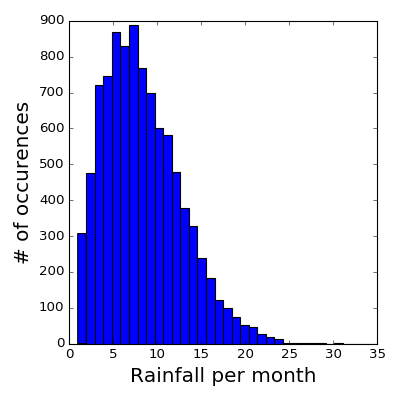

In [5]:
# Your code here?
nmonths = 10000

rainfall_values = []
for i in range(0,nmonths):
    
    
    rainfall_values.append(month())
    
plt.figure(figsize=(5,5))

plt.hist(rainfall_values,bins=35,range=(1,35))
         
plt.xlabel("Rainfall per month",fontsize=18)
plt.ylabel("# of occurences",fontsize=18)

plt.tight_layout()

### 3c (10 pts)

What is the average amount of rain to fall in any given month? 



In [6]:
print np.mean(rainfall_values)
# 8.5 cm

7.7459


### 3d (20)

Once you find the average value, someone might ask you for the uncertainty (some people also refer to uncertainty as the "*error*") on your prediction. That can be tricky to calculate, so often what is given is just a *range* of possible values. "We estimate the rainfall to be between X cm and Y cm." The question is, how to decide what that range is. 

The way this is often done is to find the middle 95% of the trial values (from your Monte Carlo run) and then use the low-edge and the high-edge of that range. If you're concerned about the middle 95%, then 2.5% of the values are below them and 2.5% of all the values are above them. The rainfall values at those edges are what you use for the ranges to quote. 

This is what people mean when they say, "I'm 95% confident that the rainfall will be between X and Y", and when you write it up for the LaTeX document, you should also quote it this way. 

*Hint!* This part becomes much easier if you sort all the values using any of the numpy/Python sort functions you can read about online. When you sort them, you should be able to find what rainfall is at the edge for the lower 2.5% and the higher 2.5%. 

In [7]:
sort = np.sort(rainfall_values)
error = np.percentile(sort,[2.5,97.5]) # Starting from 2.5 percent of sorted values to 100-2.5 or 97.5 to find range of 95%

print "95 percent of the values lie within this range: %s" % error

95 percent of the values lie within this range: [  0.  18.]
